In [1]:
!pip install ipynb

distutils: /anaconda3/include/python3.6m/UNKNOWN
sysconfig: /anaconda3/include/python3.6m
user = False
home = None
root = None
prefix = None
distutils: /anaconda3/include/python3.6m/UNKNOWN
sysconfig: /anaconda3/include/python3.6m
user = False
home = None
root = None
prefix = None


In [2]:
# import dataframe which stores information of the dataset
from ipynb.fs.full.ImageProcessing_LeNet import load_data

                                 Id                      Old_Id  \
0  ./People_after/Ennie/Ennie07.JPG  ./People/Ennie/Ennie07.JPG   
1  ./People_after/Ennie/Ennie06.JPG  ./People/Ennie/Ennie06.JPG   
2  ./People_after/Ennie/Ennie10.JPG  ./People/Ennie/Ennie10.JPG   
3  ./People_after/Ennie/Ennie04.JPG  ./People/Ennie/Ennie04.JPG   
4  ./People_after/Ennie/Ennie05.JPG  ./People/Ennie/Ennie05.JPG   

      Folder_Name   Image_Name Person_Name  Labels  
0  ./People/Ennie  Ennie07.JPG       Ennie       1  
1  ./People/Ennie  Ennie06.JPG       Ennie       1  
2  ./People/Ennie  Ennie10.JPG       Ennie       1  
3  ./People/Ennie  Ennie04.JPG       Ennie       1  
4  ./People/Ennie  Ennie05.JPG       Ennie       1   

                                    Id                        Old_Id  \
45  ./People_after/Teresa/Teresa02.JPG  ./People/Teresa/Teresa02.JPG   
46  ./People_after/Teresa/Teresa03.JPG  ./People/Teresa/Teresa03.JPG   
47  ./People_after/Teresa/Teresa01.JPG  ./People/Teresa/Teres

In [3]:
#import used libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
X, Y = load_data()

## Model Defining

In [5]:
class LeNet:
    """LeNet Architecture"""
    def build():  
        # initialize the model  
        model = Sequential()  
   
        # first set of CONV => tanh => POOL  
        model.add(Conv2D(16, (5, 5), activation='tanh', input_shape=(64, 64, 3)))  
        model.add(MaxPooling2D(pool_size=(2, 2)))
   
        # second set of CONV => relu => POOL  
        model.add(Conv2D(32, (5, 5)))  
        model.add(Activation("tanh"))  
        model.add(MaxPooling2D(pool_size=(2, 2)))
   
        # first set of Flatten => relu layers  
        model.add(Flatten())  
        model.add(Dense(120))  
        model.add(Activation("tanh"))  
        
        # second set of Flatten => relu layers  
        model.add(Flatten())  
        model.add(Dense(84))  
        model.add(Activation("tanh"))
    
        # softmax classifier  
        model.add(Dense(5, activation='softmax'))

        # return the constructed network architecture  
        return model

In [6]:
model = LeNet.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        12832     
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               6

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## Model Compiling with different optimizers

Stochastic Gradient Descent

In [8]:
LeNet_SGD = LeNet.build()

In [9]:
opt_SGD = keras.optimizers.SGD(lr=0.01)  
LeNet_SGD.compile(loss="categorical_crossentropy", optimizer=opt_SGD, metrics=["accuracy"]) 

In [10]:
LeNet_SGD_model_checkpoint = ModelCheckpoint('face_detect_LeNet_SGD.h5', verbose=1, save_best_only=True)

Adam

In [11]:
LeNet_Adam = LeNet.build()

In [12]:
opt_Adam = keras.optimizers.Adam(lr=0.01)
LeNet_Adam.compile(loss="categorical_crossentropy", optimizer=opt_Adam, metrics=["accuracy"]) 

In [13]:
LeNet_Adam_model_checkpoint = ModelCheckpoint('face_detect_LeNet_Adam.h5', verbose=1, save_best_only=True)

Adagrad

In [14]:
LeNet_Adagrad = LeNet.build()

In [15]:
opt_Adagrad = keras.optimizers.Adagrad(lr=0.01)
LeNet_Adagrad.compile(loss="categorical_crossentropy", optimizer=opt_Adagrad, metrics=["accuracy"]) 

In [16]:
LeNet_Adagrad_model_checkpoint = ModelCheckpoint('face_detect_LeNet_Adagrad.h5', verbose=1, save_best_only=True)

Adadelta

In [17]:
LeNet_Adadelta = LeNet.build()

In [18]:
opt_Adadelta = keras.optimizers.Adadelta(lr=0.01)
LeNet_Adadelta.compile(loss="categorical_crossentropy", optimizer=opt_Adadelta, metrics=["accuracy"]) 

In [19]:
LeNet_Adadelta_model_checkpoint = ModelCheckpoint('face_detect_LeNet_Adadelta.h5', verbose=1, save_best_only=True)

Nadam

In [20]:
LeNet_Nadam = LeNet.build()

In [21]:
opt_Nadam = keras.optimizers.Nadam(lr=0.01)
LeNet_Nadam.compile(loss="categorical_crossentropy", optimizer=opt_Nadam, metrics=["accuracy"]) 

In [22]:
LeNet_Nadam_model_checkpoint = ModelCheckpoint('face_detect_LeNet_Nadam.h5', verbose=1, save_best_only=True)

## Model Training

In [23]:
n_folds=5
epochs=30
batch_size=8

In [24]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.1, random_state = 5)

In [25]:
#define a function to fit the model
def fit_and_evaluate(model, x_train, x_valid, x_test, y_train, y_valid, y_test, model_checkpoint):
    history = None
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=[early_stopping, model_checkpoint],
                        validation_data=(x_valid, y_valid))  
    print("Val Score: ", model.evaluate(x_test, y_test))
    return history

Stochastic Gradient Descent

In [26]:
#save the model history in a list after fitting so that we can plot later
LeNet_SGD_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, 
                                               random_state = np.random.randint(1,500, 1)[0])
    LeNet_SGD_history.append(fit_and_evaluate(LeNet_SGD, x_train, X_valid, x_test,
                                              y_train, Y_valid, y_test, LeNet_SGD_model_checkpoint))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 1/30
5/5 [==============================] - 1s 202ms/step - loss: 1.8334 - accuracy: 0.1730 - val_loss: 2.0107 - val_accuracy: 0.2000

Epoch 00001: val_loss improved from inf to 2.01067, saving model to face_detect_LeNet_SGD.h5
Epoch 2/30
5/5 [==============================] - 0s 50ms/step - loss: 1.7593 - accuracy: 0.1325 - val_loss: 1.7739 - val_accuracy: 0.4000

Epoch 00002: val_loss improved from 2.01067 to 1.77393, saving model to face_detect_LeNet_SGD.h5
Epoch 3/30
5/5 [==============================] - 0s 41ms/step - loss: 1.6222 - accuracy: 0.3119 - val_loss: 1.7296 - val_accuracy: 0.2000

Epoch 00003: val_loss improved from 1.77393 to 1.72960, saving model to face_detect_LeNet_SGD.h5
Epoch 4/30
5/5 [==============================] - 0s 36ms/step - loss: 1.4831 - accuracy: 0.4456 - val_loss: 1.6999 - val_accuracy: 0.2000

Epoch 00004: val_loss improved from 1.72960 to 1.69994, saving model to face_detect_LeNet_SGD.h5
Epoch 5/30
5/5 [==================

Adam

In [27]:
#save the model history in a list after fitting so that we can plot later
LeNet_Adam_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, 
                                               random_state = np.random.randint(1,500, 1)[0])
    LeNet_Adam_history.append(fit_and_evaluate(LeNet_Adam, x_train, X_valid, x_test,
                                              y_train, Y_valid, y_test, LeNet_Adam_model_checkpoint))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 1/30
5/5 [==============================] - 1s 88ms/step - loss: 2.7043 - accuracy: 0.1927 - val_loss: 3.6733 - val_accuracy: 0.2000

Epoch 00001: val_loss improved from inf to 3.67328, saving model to face_detect_LeNet_Adam.h5
Epoch 2/30
5/5 [==============================] - 0s 33ms/step - loss: 2.7454 - accuracy: 0.1719 - val_loss: 2.8458 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss improved from 3.67328 to 2.84581, saving model to face_detect_LeNet_Adam.h5
Epoch 3/30
5/5 [==============================] - 0s 35ms/step - loss: 1.8955 - accuracy: 0.2662 - val_loss: 1.7280 - val_accuracy: 0.2000

Epoch 00003: val_loss improved from 2.84581 to 1.72798, saving model to face_detect_LeNet_Adam.h5
Epoch 4/30
5/5 [==============================] - 0s 62ms/step - loss: 1.6667 - accuracy: 0.1875 - val_loss: 1.6629 - val_accuracy: 0.2000

Epoch 00004: val_loss improved from 1.72798 to 1.66294, saving model to face_detect_LeNet_Adam.h5
Epoch 5/30
5/5 [===========

5/5 [==============================] - 0s 33ms/step - loss: 1.6734 - accuracy: 0.2500 - val_loss: 1.9550 - val_accuracy: 0.0000e+00

Epoch 00013: val_loss did not improve from 1.49519
Epoch 14/30
5/5 [==============================] - 0s 33ms/step - loss: 1.6778 - accuracy: 0.1944 - val_loss: 1.7182 - val_accuracy: 0.2000

Epoch 00014: val_loss did not improve from 1.49519
Epoch 15/30
5/5 [==============================] - 0s 33ms/step - loss: 1.6747 - accuracy: 0.1111 - val_loss: 1.6171 - val_accuracy: 0.2000

Epoch 00015: val_loss did not improve from 1.49519
Epoch 16/30
5/5 [==============================] - 0s 33ms/step - loss: 1.6164 - accuracy: 0.2500 - val_loss: 1.7084 - val_accuracy: 0.0000e+00

Epoch 00016: val_loss did not improve from 1.49519
1/1 [==============================] - 0s 24ms/step - loss: 1.7254 - accuracy: 0.1111
Val Score:  [1.7254300117492676, 0.1111111119389534]


Training on Fold:  5
Epoch 1/30
5/5 [==============================] - 0s 48ms/step - loss: 1.6

Adagrad

In [28]:
#save the model history in a list after fitting so that we can plot later
LeNet_Adagrad_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, 
                                               random_state = np.random.randint(1,500, 1)[0])
    LeNet_Adagrad_history.append(fit_and_evaluate(LeNet_Adagrad, x_train, X_valid, x_test,
                                              y_train, Y_valid, y_test, LeNet_Adagrad_model_checkpoint))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 1/30
5/5 [==============================] - 1s 85ms/step - loss: 1.7463 - accuracy: 0.2164 - val_loss: 2.2264 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 2.22639, saving model to face_detect_LeNet_Adagrad.h5
Epoch 2/30
5/5 [==============================] - 0s 41ms/step - loss: 1.6383 - accuracy: 0.3119 - val_loss: 1.7422 - val_accuracy: 0.2000

Epoch 00002: val_loss improved from 2.22639 to 1.74219, saving model to face_detect_LeNet_Adagrad.h5
Epoch 3/30
5/5 [==============================] - 0s 51ms/step - loss: 1.5318 - accuracy: 0.1794 - val_loss: 1.7218 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss improved from 1.74219 to 1.72178, saving model to face_detect_LeNet_Adagrad.h5
Epoch 4/30
5/5 [==============================] - 0s 36ms/step - loss: 1.4385 - accuracy: 0.5729 - val_loss: 1.7793 - val_accuracy: 0.2000

Epoch 00004: val_loss did not improve from 1.72178
Epoch 5/30
5/5 [==============================] - 0s 37ms/ste

Adadelta

In [29]:
#save the model history in a list after fitting so that we can plot later
LeNet_Adadelta_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, 
                                               random_state = np.random.randint(1,500, 1)[0])
    LeNet_Adadelta_history.append(fit_and_evaluate(LeNet_Adadelta, x_train, X_valid, x_test,
                                              y_train, Y_valid, y_test, LeNet_Adadelta_model_checkpoint))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 1/30
5/5 [==============================] - 1s 97ms/step - loss: 1.6335 - accuracy: 0.2199 - val_loss: 1.6681 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 1.66812, saving model to face_detect_LeNet_Adadelta.h5
Epoch 2/30
5/5 [==============================] - 0s 36ms/step - loss: 1.6073 - accuracy: 0.1869 - val_loss: 1.6561 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss improved from 1.66812 to 1.65610, saving model to face_detect_LeNet_Adadelta.h5
Epoch 3/30
5/5 [==============================] - 0s 39ms/step - loss: 1.5837 - accuracy: 0.2506 - val_loss: 1.6426 - val_accuracy: 0.2000

Epoch 00003: val_loss improved from 1.65610 to 1.64263, saving model to face_detect_LeNet_Adadelta.h5
Epoch 4/30
5/5 [==============================] - 0s 34ms/step - loss: 1.5888 - accuracy: 0.2975 - val_loss: 1.6506 - val_accuracy: 0.2000

Epoch 00004: val_loss did not improve from 1.64263
Epoch 5/30
5/5 [==============================] - 0s 39ms/

Epoch 1/30
5/5 [==============================] - 0s 75ms/step - loss: 1.4974 - accuracy: 0.5833 - val_loss: 1.5704 - val_accuracy: 0.6000

Epoch 00001: val_loss did not improve from 1.54176
Epoch 2/30
5/5 [==============================] - 0s 54ms/step - loss: 1.4863 - accuracy: 0.5556 - val_loss: 1.5625 - val_accuracy: 0.6000

Epoch 00002: val_loss did not improve from 1.54176
Epoch 3/30
5/5 [==============================] - 0s 50ms/step - loss: 1.4729 - accuracy: 0.4167 - val_loss: 1.5799 - val_accuracy: 0.4000

Epoch 00003: val_loss did not improve from 1.54176
Epoch 4/30
5/5 [==============================] - 0s 33ms/step - loss: 1.4641 - accuracy: 0.6111 - val_loss: 1.6122 - val_accuracy: 0.2000

Epoch 00004: val_loss did not improve from 1.54176
Epoch 5/30
5/5 [==============================] - 0s 34ms/step - loss: 1.4513 - accuracy: 0.7500 - val_loss: 1.6097 - val_accuracy: 0.2000

Epoch 00005: val_loss did not improve from 1.54176
Epoch 6/30
5/5 [=============================

Nadam

In [30]:
#save the model history in a list after fitting so that we can plot later
LeNet_Nadam_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, 
                                               random_state = np.random.randint(1,500, 1)[0])
    LeNet_Nadam_history.append(fit_and_evaluate(LeNet_Nadam, x_train, X_valid, x_test,
                                              y_train, Y_valid, y_test, LeNet_Nadam_model_checkpoint))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 1/30
5/5 [==============================] - 2s 97ms/step - loss: 2.9651 - accuracy: 0.3194 - val_loss: 2.8361 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 2.83613, saving model to face_detect_LeNet_Nadam.h5
Epoch 2/30
5/5 [==============================] - 0s 54ms/step - loss: 2.3897 - accuracy: 0.2141 - val_loss: 1.9100 - val_accuracy: 0.2000

Epoch 00002: val_loss improved from 2.83613 to 1.90999, saving model to face_detect_LeNet_Nadam.h5
Epoch 3/30
5/5 [==============================] - 0s 40ms/step - loss: 1.9305 - accuracy: 0.1563 - val_loss: 1.9366 - val_accuracy: 0.2000

Epoch 00003: val_loss did not improve from 1.90999
Epoch 4/30
5/5 [==============================] - 0s 37ms/step - loss: 1.9092 - accuracy: 0.1510 - val_loss: 1.7676 - val_accuracy: 0.2000

Epoch 00004: val_loss improved from 1.90999 to 1.76762, saving model to face_detect_LeNet_Nadam.h5
Epoch 5/30
5/5 [==============================] - 0s 37ms/step - loss: 

5/5 [==============================] - 0s 56ms/step - loss: 1.7653 - accuracy: 0.1111 - val_loss: 2.1992 - val_accuracy: 0.2000

Epoch 00010: val_loss did not improve from 1.51736
1/1 [==============================] - 0s 44ms/step - loss: 1.7392 - accuracy: 0.1111
Val Score:  [1.7392021417617798, 0.1111111119389534]


Training on Fold:  5
Epoch 1/30
5/5 [==============================] - 0s 100ms/step - loss: 1.7410 - accuracy: 0.1111 - val_loss: 2.0298 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss did not improve from 1.51736
Epoch 2/30
5/5 [==============================] - 0s 51ms/step - loss: 1.7734 - accuracy: 0.1667 - val_loss: 1.9725 - val_accuracy: 0.2000

Epoch 00002: val_loss did not improve from 1.51736
Epoch 3/30
5/5 [==============================] - 0s 79ms/step - loss: 1.7058 - accuracy: 0.2222 - val_loss: 2.0354 - val_accuracy: 0.2000

Epoch 00003: val_loss did not improve from 1.51736
Epoch 4/30
5/5 [==============================] - 0s 39ms/step - loss: 1.7399 - 

## Model Evaluation - Accuracy and predictions

Stochastic Gradient Descent

In [31]:
model_SGD = load_model('face_detect_LeNet_SGD.h5')

In [32]:
# Score trained model.
model_SGD.evaluate(x_test, y_test)

1/1 [==============================] - 0s 203ms/step - loss: 0.2463 - accuracy: 1.0000


[0.24631139636039734, 1.0]

In [33]:
# Score trained model.
model_SGD.evaluate(X_valid, Y_valid)

1/1 [==============================] - 0s 31ms/step - loss: 1.0774 - accuracy: 0.4000


[1.07744300365448, 0.4000000059604645]

In [34]:
# make predictions.
pred_SGD = model_SGD.predict(X_valid)

Adam

In [35]:
model_Adam = load_model('face_detect_LeNet_Adam.h5')

In [36]:
# Score trained model.
model_Adam.evaluate(x_test, y_test)

1/1 [==============================] - 0s 244ms/step - loss: 1.6244 - accuracy: 0.3333


[1.6243746280670166, 0.3333333432674408]

In [37]:
# Score trained model.
model_Adam.evaluate(X_valid, Y_valid)

1/1 [==============================] - 0s 24ms/step - loss: 1.4952 - accuracy: 0.4000


[1.4951941967010498, 0.4000000059604645]

In [38]:
# make predictions.
pred_Adam = model_Adam.predict(X_valid)

Adadelta

In [39]:
model_Adadelta = load_model('face_detect_LeNet_Adadelta.h5')

In [40]:
# Score trained model.
model_Adadelta.evaluate(x_test, y_test)

1/1 [==============================] - 0s 154ms/step - loss: 1.5012 - accuracy: 0.4444


[1.5011972188949585, 0.4444444477558136]

In [41]:
# Score trained model.
model_Adadelta.evaluate(X_valid, Y_valid)

1/1 [==============================] - 0s 20ms/step - loss: 1.5418 - accuracy: 0.2000


[1.5417613983154297, 0.20000000298023224]

In [42]:
# make predictions.
pred_Adadelta = model_Adadelta.predict(X_valid)

Nadam

In [43]:
model_Nadam = load_model('face_detect_LeNet_Nadam.h5')

In [44]:
# Score trained model.
model_Nadam.evaluate(x_test, y_test)

1/1 [==============================] - 0s 184ms/step - loss: 1.4875 - accuracy: 0.3333


[1.4875410795211792, 0.3333333432674408]

In [45]:
# Score trained model.
model_Nadam.evaluate(X_valid, Y_valid)

1/1 [==============================] - 0s 22ms/step - loss: 1.5174 - accuracy: 0.2000


[1.5173606872558594, 0.20000000298023224]

In [46]:
# make predictions.
pred_Nadam = model_Nadam.predict(X_valid)

Adagrad

In [47]:
model_Adagrad = load_model('face_detect_LeNet_Adagrad.h5')

In [48]:
# Score trained model.
model_Adagrad.evaluate(x_test, y_test)

1/1 [==============================] - 0s 148ms/step - loss: 0.0539 - accuracy: 1.0000


[0.053869955241680145, 1.0]

In [49]:
# Score trained model.
model_Adagrad.evaluate(X_valid, Y_valid)

1/1 [==============================] - 0s 23ms/step - loss: 0.9707 - accuracy: 0.6000


[0.9706772565841675, 0.6000000238418579]

In [50]:
# make predictions.
pred_Adagrad = model_Adagrad.predict(X_valid)

## Model Evaluation - model accuracy/loss curves

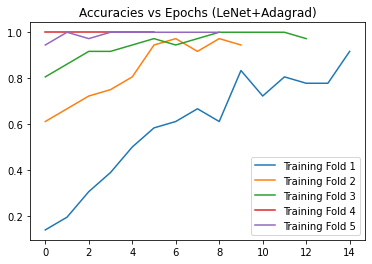

In [51]:
plt.title('Accuracies vs Epochs (LeNet+Adagrad)')
plt.plot(LeNet_SGD_history[0].history['accuracy'], label='Training Fold 1')
plt.plot(LeNet_SGD_history[1].history['accuracy'], label='Training Fold 2')
plt.plot(LeNet_SGD_history[2].history['accuracy'], label='Training Fold 3')
plt.plot(LeNet_SGD_history[3].history['accuracy'], label='Training Fold 4')
plt.plot(LeNet_SGD_history[4].history['accuracy'], label='Training Fold 5')
plt.legend()
plt.show()

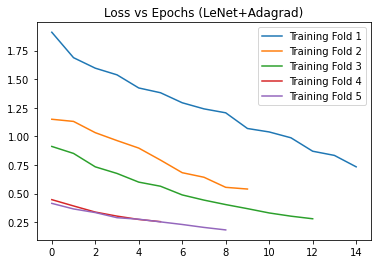

In [52]:
plt.title('Loss vs Epochs (LeNet+Adagrad)')
plt.plot(LeNet_SGD_history[0].history['loss'], label='Training Fold 1')
plt.plot(LeNet_SGD_history[1].history['loss'], label='Training Fold 2')
plt.plot(LeNet_SGD_history[2].history['loss'], label='Training Fold 3')
plt.plot(LeNet_SGD_history[3].history['loss'], label='Training Fold 4')
plt.plot(LeNet_SGD_history[4].history['loss'], label='Training Fold 5')
plt.legend()
plt.show()

## Model Evaluation - confusion matrix

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 5)

In [54]:
# Score trained model.
model_SGD.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.6719 - accuracy: 0.7692


[0.6719048023223877, 0.7692307829856873]

In [55]:
# make predictions.
pred_SGD = model_SGD.predict(X_test)

In [56]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    # Show all ticks
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # Label ticks with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

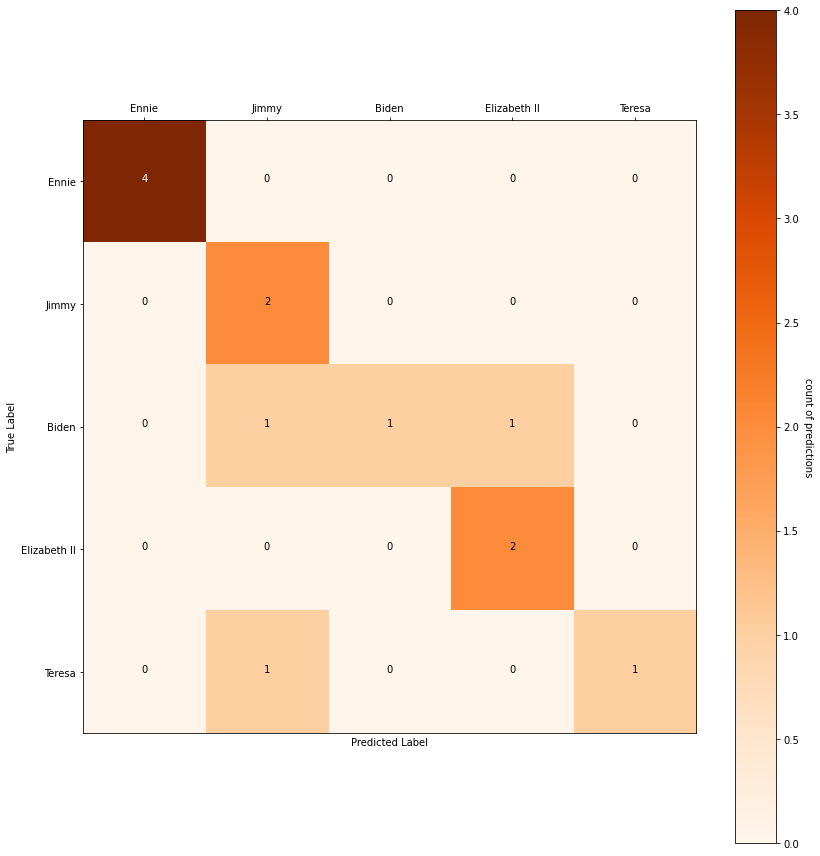

In [57]:
labels = ['Ennie','Jimmy','Biden','Elizabeth II','Teresa']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred_SGD, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred_SGD[errors]
Y_true_errors = Y_true[errors]
X_valid_errors = X_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax, cmap=plt.cm.Oranges, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()